# Build basic 2-Layer MLP to solve the xor-Problem

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [30]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [31]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

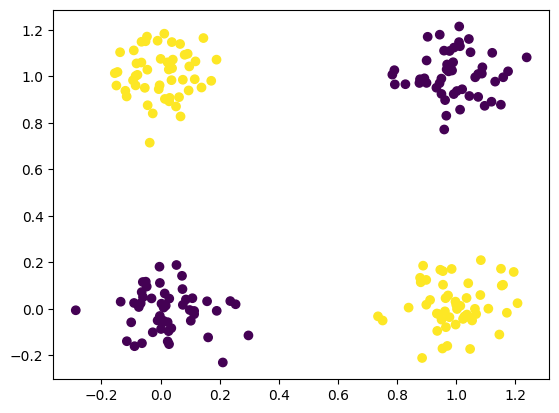

In [32]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
Y_train = torch.FloatTensor(y_train)
Y_test = torch.FloatTensor(y_test)

In [40]:
import torch
class Perceptron(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(Perceptron, self).__init__()
        self.fc = torch.nn.Linear(2,1,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output
        self.non_linear = torch.nn.Sigmoid() #non-linear activation
    def forward(self, x): #build network
        output = self.fc(x) #w*X
        output = self.non_linear(output) # activation
        return output

In [41]:
model1 = Perceptron()
criterion1 = torch.nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr = 0.01)

In [42]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.71409569
Iteration 2, loss = 0.70450338
Iteration 3, loss = 0.69556518
Iteration 4, loss = 0.68863319
Iteration 5, loss = 0.68320525
Iteration 6, loss = 0.67860950
Iteration 7, loss = 0.67397001
Iteration 8, loss = 0.66903609
Iteration 9, loss = 0.66383776
Iteration 10, loss = 0.65848060
Iteration 11, loss = 0.65307483
Iteration 12, loss = 0.64763104
Iteration 13, loss = 0.64223758
Iteration 14, loss = 0.63687849
Iteration 15, loss = 0.63157612
Iteration 16, loss = 0.62636319
Iteration 17, loss = 0.62116803
Iteration 18, loss = 0.61585824
Iteration 19, loss = 0.61047056
Iteration 20, loss = 0.60506910
Iteration 21, loss = 0.59955687
Iteration 22, loss = 0.59400811
Iteration 23, loss = 0.58842476
Iteration 24, loss = 0.58277464
Iteration 25, loss = 0.57696836
Iteration 26, loss = 0.57105391
Iteration 27, loss = 0.56508506
Iteration 28, loss = 0.55892472
Iteration 29, loss = 0.55255998
Iteration 30, loss = 0.54601269
Iteration 31, loss = 0.53935858
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [43]:
ypred=clf.predict(X_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

1.0